# **1- Data Collection**

**1.1- Importing File Formats**

In [1]:
import pandas as pd

# Importing CSV file
df = pd.read_csv('/content/aapl_us_d.csv')

**1.21- Checking Data Types**

In [2]:
data_types = df.dtypes
print(data_types)

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object


**1.22- Checking Duplicates**

In [3]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


# **2- Data Exploration**

**2.1- Understanding the Structure**

**2.11- View the First Few Rows**

In [4]:
df.head()

Date      Open      High       Low     Close        Volume
0  1984-09-07  0.100763  0.101999  0.099546  0.100763  9.767604e+07
1  1984-09-10  0.100763  0.101071  0.098340  0.100165  7.581254e+07
2  1984-09-11  0.101071  0.103814  0.101071  0.101999  1.787705e+08
3  1984-09-12  0.101999  0.102597  0.098928  0.098928  1.561713e+08
4  1984-09-13  0.104432  0.104730  0.104432  0.104432  2.432310e+08

**2.12- View DataFrame Information**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10080 entries, 0 to 10079
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    10080 non-null  object 
 1   Open    10080 non-null  float64
 2   High    10080 non-null  float64
 3   Low     10080 non-null  float64
 4   Close   10080 non-null  float64
 5   Volume  10080 non-null  float64
dtypes: float64(5), object(1)
memory usage: 472.6+ KB


**2.13- Summary Statistics**

In [6]:
df.describe()

Open          High           Low         Close        Volume
count  10080.000000  10080.000000  10080.000000  10080.000000  1.008000e+04
mean      24.212653     24.474183     23.962728     24.228588  3.901825e+08
std       48.475894     48.997820     47.988301     48.513977  4.026818e+08
min        0.055411      0.056019      0.054803      0.054803  2.811754e+06
25%        0.292936      0.298629      0.286002      0.292288  1.385973e+08
50%        0.884054      0.907432      0.864364      0.883006  2.576699e+08
75%       21.635500     21.869775     21.426925     21.649000  4.927167e+08
max      236.480000    237.230000    233.090000    234.820000  8.706575e+09

**2.14- View Column Names**

In [7]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

**2.15- Shape of the Data**

In [8]:
df.shape

(10080, 6)

**2.16- View a Desired Sample of 5 Rows**

In [9]:
df.sample(5)

Date       Open       High        Low      Close        Volume
2279  1993-09-13   0.199741   0.201576   0.188515   0.192054  3.000707e+08
361   1986-02-11   0.090713   0.091012   0.089218   0.090713  1.800318e+08
3260  1997-07-30   0.129046   0.134540   0.127551   0.132137  4.391086e+08
8523  2018-06-29  44.636900  44.855200  43.829300  44.355700  9.489265e+07
5175  2005-03-14   1.233430   1.241710   1.203130   1.227450  7.101146e+08

**2.2- Missing Values**

**2.21- Identifying Missing Values**

In [10]:
missing_values = df.isnull().sum()
print(missing_values)

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


**2.22- Dropping Rows or Columns with Missing Values**

In [11]:
# Drop rows with any missing values
df_cleaned_rows = df.dropna()

# Drop columns with any missing values
df_cleaned_columns = df.dropna(axis=1)

# **3- Data Cleaning**

**3.1- Identifying Outliers using Z-Score**

In [12]:
from scipy import stats

# Calculate Z-scores of each value in the DataFrame
z_scores = stats.zscore(df.select_dtypes(include=['float64', 'int64']))

# Identify outliers (Z-score > 3 or < -3)
df_outliers = df[(z_scores > 3).any(axis=1) | (z_scores < -3).any(axis=1)]
print(f"Number of outliers: {df_outliers.shape[0]}")

Number of outliers: 590


**3.2- Remove Outliers**

In [13]:
# Remove rows with outliers based on Z-score
df_no_outliers = df[(z_scores < 3).all(axis=1) & (z_scores > -3).all(axis=1)]

# **Stock Analysis**

**What is the trend of the stock price over time?**

In [14]:
import plotly.graph_objects as go

# Create a line chart for stock prices
fig = go.Figure()

fig.add_trace(go.Scatter(x=df['Date'], y=df['Open'], mode='lines', name='Open', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=df['Date'], y=df['Close'], mode='lines', name='Close', line=dict(color='green')))
fig.add_trace(go.Scatter(x=df['Date'], y=df['High'], mode='lines', name='High', line=dict(color='red')))
fig.add_trace(go.Scatter(x=df['Date'], y=df['Low'], mode='lines', name='Low', line=dict(color='orange')))

fig.update_layout(title='Apple Stock Price Trend Over Time',
                  xaxis_title='Date',
                  yaxis_title='Stock Price',
                  xaxis_tickangle=-45)
fig.show()

**Is there a significant difference between the Open and Close prices?**

In [15]:
# Create a new column for price difference
df['Price_Difference'] = df['Close'] - df['Open']

# Plot the price difference
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Date'], y=df['Price_Difference'], mode='lines', name='Price Difference', line=dict(color='purple')))

fig.update_layout(title='Difference Between Open and Close Prices Over Time',
                  xaxis_title='Date',
                  yaxis_title='Price Difference (Close - Open)',
                  xaxis_tickangle=-45)
fig.show()

**What is the distribution of the stock prices?**

In [16]:
import plotly.express as px

# Plot histograms for stock prices
fig = px.histogram(df, x=['Open', 'Close', 'High', 'Low'], barmode='overlay', histnorm='percent', nbins=50)

fig.update_layout(title='Distribution of Stock Prices',
                  xaxis_title='Stock Prices',
                  yaxis_title='Percentage')
fig.show()

**Is there any correlation between the stock prices and trading volume?**

In [17]:
import plotly.figure_factory as ff

# Calculate correlation matrix
correlation_matrix = df[['Open', 'Close', 'High', 'Low', 'Volume']].corr()

# Plot the heatmap using Plotly
fig = ff.create_annotated_heatmap(z=correlation_matrix.values, x=list(correlation_matrix.columns), y=list(correlation_matrix.index),
                                  colorscale='Viridis', showscale=True)

fig.update_layout(title='Correlation Matrix of Stock Prices and Volume')
fig.show()

**What is the daily trading volume trend?**

In [18]:
# Plot the trading volume over time
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Date'], y=df['Volume'], mode='lines', name='Volume', line=dict(color='blue')))

fig.update_layout(title='Daily Trading Volume Over Time',
                  xaxis_title='Date',
                  yaxis_title='Volume',
                  xaxis_tickangle=-45)
fig.show()

**How do the High and Low stock prices fluctuate during the year?**

In [19]:
# Plotting high and low stock prices
fig = go.Figure()

fig.add_trace(go.Scatter(x=df['Date'], y=df['High'], mode='lines', name='High', line=dict(color='red')))
fig.add_trace(go.Scatter(x=df['Date'], y=df['Low'], mode='lines', name='Low', line=dict(color='blue')))

fig.update_layout(title='High vs Low Stock Prices Over Time',
                  xaxis_title='Date',
                  yaxis_title='Stock Price',
                  xaxis_tickangle=-45)
fig.show()

**What are the outliers in the stock prices?**

In [20]:
# Scatter plot to visualize the outliers in Open stock prices
fig = go.Figure()

fig.add_trace(go.Scatter(x=df['Date'], y=df['Open'], mode='lines', name='Open', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=df_outliers['Date'], y=df_outliers['Open'], mode='markers', name='Outliers (Open)', marker=dict(color='red', size=8)))

fig.update_layout(title='Outliers in Open Stock Prices',
                  xaxis_title='Date',
                  yaxis_title='Stock Price',
                  xaxis_tickangle=-45)
fig.show()

**Is the stock price volatility increasing or decreasing?**

In [21]:
# Calculate volatility as the difference between High and Low prices
df['Volatility'] = df['High'] - df['Low']

# Plot the volatility over time
fig = go.Figure()

fig.add_trace(go.Scatter(x=df['Date'], y=df['Volatility'], mode='lines', name='Volatility', line=dict(color='orange')))

fig.update_layout(title='Stock Price Volatility Over Time',
                  xaxis_title='Date',
                  yaxis_title='Volatility (High - Low)',
                  xaxis_tickangle=-45)
fig.show()

**What is the relationship between stock price and trading volume?**

In [22]:
# Scatter plot to show relationship between Close price and Volume
fig = go.Figure()

fig.add_trace(go.Scatter(x=df['Volume'], y=df['Close'], mode='markers', name='Close Price vs Volume',
                         marker=dict(color='purple', size=5)))

fig.update_layout(title='Relationship Between Close Price and Trading Volume',
                  xaxis_title='Volume',
                  yaxis_title='Close Price')
fig.show()

**What are the cumulative returns over time?**

In [23]:
# Calculate daily returns
df['Daily_Return'] = df['Close'].pct_change()

# Calculate cumulative returns
df['Cumulative_Return'] = (1 + df['Daily_Return']).cumprod()

# Plot the cumulative returns
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Date'], y=df['Cumulative_Return'], mode='lines', name='Cumulative Return',
                         line=dict(color='green')))

fig.update_layout(title='Cumulative Returns Over Time',
                  xaxis_title='Date',
                  yaxis_title='Cumulative Return',
                  xaxis_tickangle=-45)
fig.show()

**How does the stock price behave before and after large price changes?**

In [24]:
# Identify large price changes (change greater than 2%)
df['Price_Change'] = df['Close'].pct_change() * 100
large_changes = df[abs(df['Price_Change']) > 2]

# Plot Close price around large price changes
fig = go.Figure()

fig.add_trace(go.Scatter(x=df['Date'], y=df['Close'], mode='lines', name='Close Price', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=large_changes['Date'], y=large_changes['Close'], mode='markers',
                         name='Large Price Changes', marker=dict(color='red', size=8)))

fig.update_layout(title='Close Price Before and After Large Price Changes',
                  xaxis_title='Date',
                  yaxis_title='Close Price',
                  xaxis_tickangle=-45)
fig.show()

**What are the rolling averages of the stock prices?**

In [25]:
# Calculate 30-day and 90-day rolling averages
df['30_Day_MA'] = df['Close'].rolling(window=30).mean()
df['90_Day_MA'] = df['Close'].rolling(window=90).mean()

# Plot rolling averages along with Close price
fig = go.Figure()

fig.add_trace(go.Scatter(x=df['Date'], y=df['Close'], mode='lines', name='Close Price', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=df['Date'], y=df['30_Day_MA'], mode='lines', name='30-Day MA', line=dict(color='orange')))
fig.add_trace(go.Scatter(x=df['Date'], y=df['90_Day_MA'], mode='lines', name='90-Day MA', line=dict(color='green')))

fig.update_layout(title='Stock Price with 30-Day and 90-Day Rolling Averages',
                  xaxis_title='Date',
                  yaxis_title='Stock Price',
                  xaxis_tickangle=-45)
fig.show()

**Is there a trend in the stock price volatility over time?**

In [26]:
# Calculate 30-day rolling volatility (difference between High and Low)
df['30_Day_Volatility'] = df['Volatility'].rolling(window=30).mean()

# Plot rolling volatility
fig = go.Figure()

fig.add_trace(go.Scatter(x=df['Date'], y=df['Volatility'], mode='lines', name='Volatility', line=dict(color='red')))
fig.add_trace(go.Scatter(x=df['Date'], y=df['30_Day_Volatility'], mode='lines', name='30-Day Volatility', line=dict(color='purple')))

fig.update_layout(title='Volatility with 30-Day Rolling Average',
                  xaxis_title='Date',
                  yaxis_title='Volatility (High - Low)',
                  xaxis_tickangle=-45)
fig.show()

**Can we create an interactive candlestick chart for daily stock prices?**

In [27]:
# Create a candlestick chart
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'], high=df['High'], low=df['Low'], close=df['Close'])])

fig.update_layout(title='Apple Stock Price Candlestick Chart',
                  xaxis_title='Date',
                  yaxis_title='Stock Price',
                  xaxis_tickangle=-45)

fig.show()

**What is the distribution of stock volumes?**

In [28]:
# Plot histogram of stock trading volumes
fig = px.histogram(df, x='Volume',
                   title='Distribution of Stock Trading Volumes',
                   labels={'Volume': 'Trading Volume'},
                   nbins=50,
                   color_discrete_sequence=['teal'])

fig.update_layout(xaxis_title='Volume', yaxis_title='Count')
fig.show()

**How often do daily stock prices increase or decrease?**

In [29]:
# Calculate the price movement (Increase/Decrease)
df['Price_Movement'] = df['Close'] > df['Open']

# Calculate proportions of increase vs decrease
movement_counts = df['Price_Movement'].value_counts()

# Define labels
labels = ['Increase', 'Decrease']

# Plot pie chart of price movements
fig = px.pie(names=labels, values=movement_counts,
             title='Proportion of Daily Price Movements (Increase vs Decrease)',
             color_discrete_sequence=['green', 'red'])

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

**Does trading volume differ between days when the price increased versus decreased?**

In [30]:
# Group by price movement and calculate the average trading volume
avg_volume_by_movement = df.groupby('Price_Movement')['Volume'].mean().reset_index()

# Map the boolean values to more descriptive labels
avg_volume_by_movement['Price_Movement'] = avg_volume_by_movement['Price_Movement'].map({True: 'Increase', False: 'Decrease'})

# Plot average trading volume by price movement
fig = px.bar(avg_volume_by_movement, x='Price_Movement', y='Volume',
             title='Average Trading Volume on Price Increase vs Decrease Days',
             labels={'Price_Movement': 'Price Movement', 'Volume': 'Average Volume'},
             color='Price_Movement', color_discrete_sequence=['green', 'red'])

fig.update_layout(xaxis_title='Price Movement', yaxis_title='Average Trading Volume')
fig.show()

**What is the daily volatility of the stock?**

In [31]:
# Calculate the daily volatility as a percentage difference between high and low prices
df['Volatility'] = ((df['High'] - df['Low']) / df['Low']) * 100

# Plot daily volatility
fig = px.line(df, x='Date', y='Volatility',
              title='Daily Stock Price Volatility',
              labels={'Volatility': 'Daily Volatility (%)', 'Date': 'Date'})

fig.update_layout(xaxis_title='Date', yaxis_title='Volatility (%)', xaxis_tickangle=-45)
fig.show()

**How do the Open, High, Low, Close, and Volume values relate to one another?**

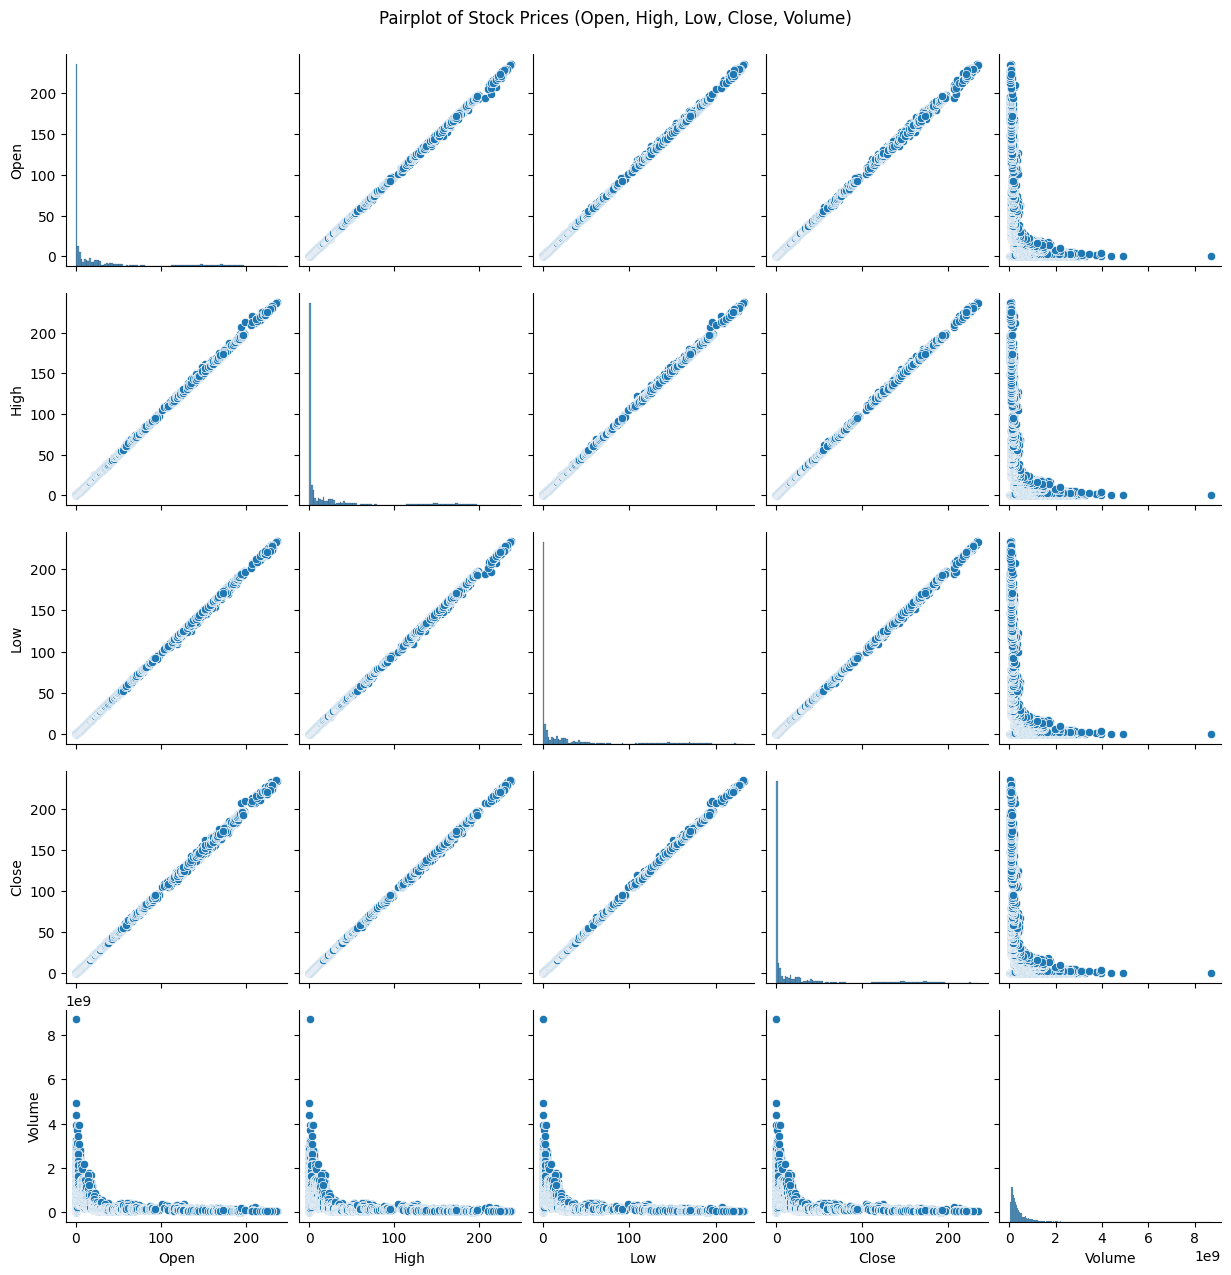

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Select specific columns for pairplot
pairplot_columns = ['Open', 'High', 'Low', 'Close', 'Volume']

# Plot pairplot
sns.pairplot(df[pairplot_columns])
plt.suptitle("Pairplot of Stock Prices (Open, High, Low, Close, Volume)", y=1.02)
plt.show()

**How do the stock price features (Open, High, Low, Close) relate to each other when comparing days of price increase vs decrease?**

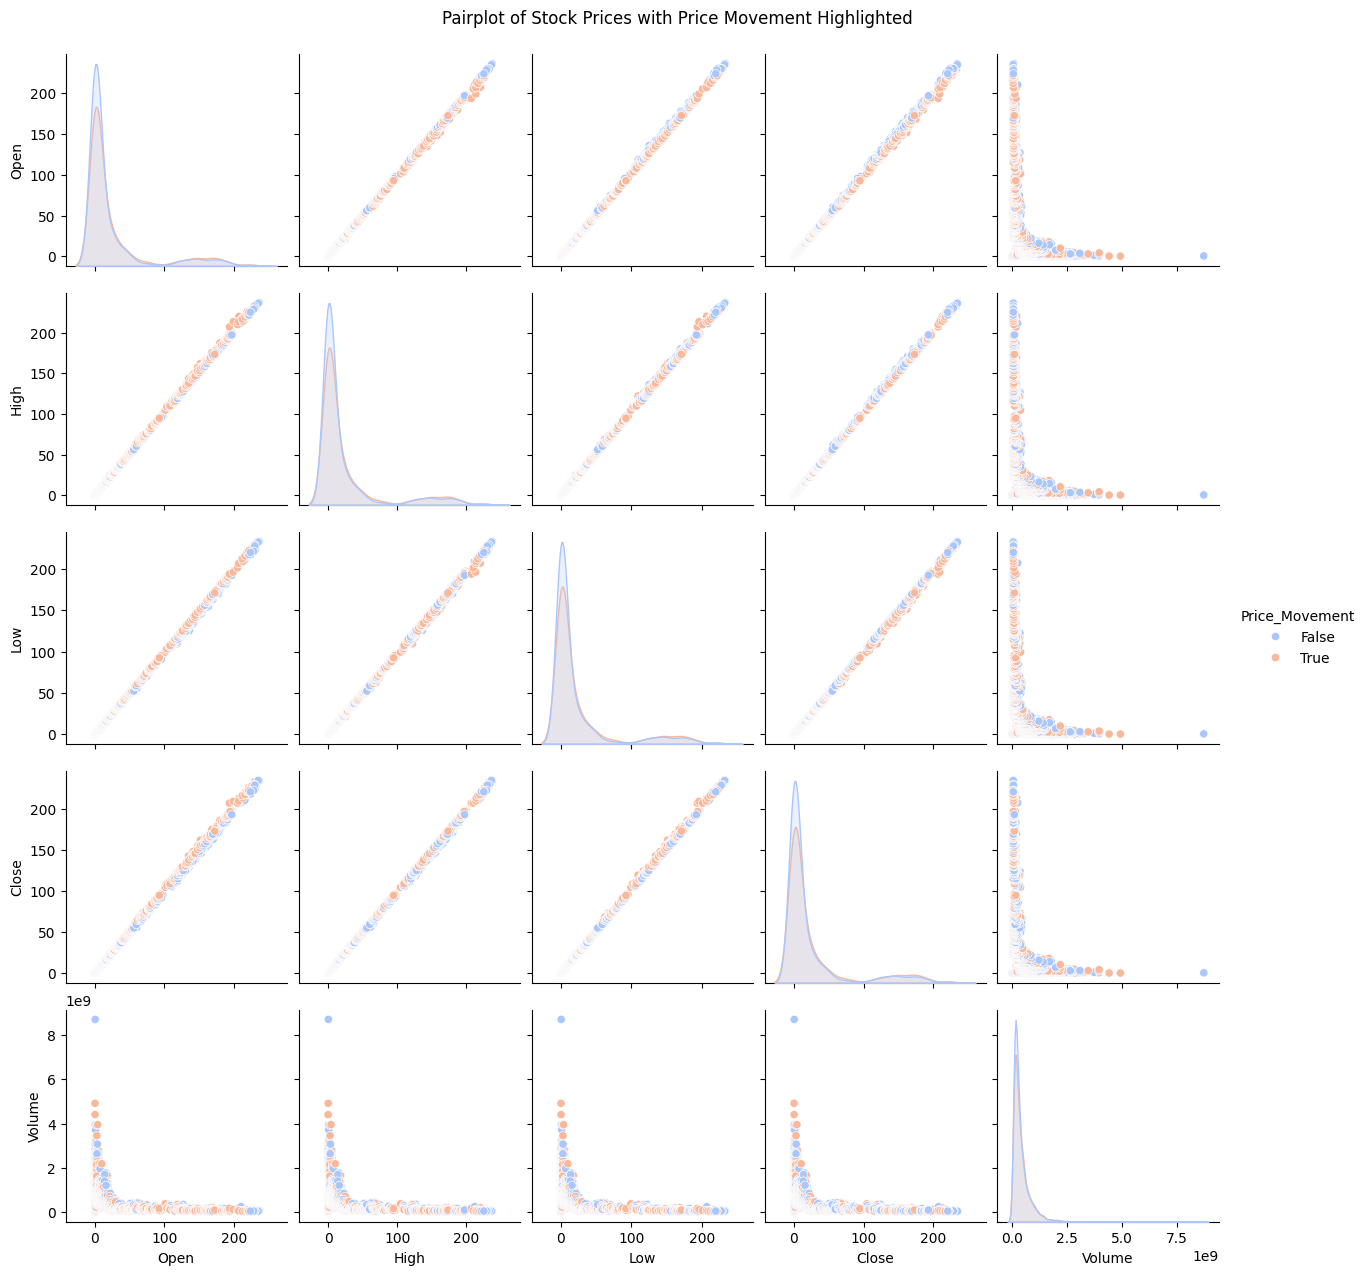

In [33]:
# Plot pairplot with 'Price_Movement' hue
sns.pairplot(df[pairplot_columns + ['Price_Movement']], hue='Price_Movement', palette='coolwarm', diag_kind='kde')
plt.suptitle("Pairplot of Stock Prices with Price Movement Highlighted", y=1.02)
plt.show()

**How does Volume relate to Price_Difference (the difference between Close and Open)?**

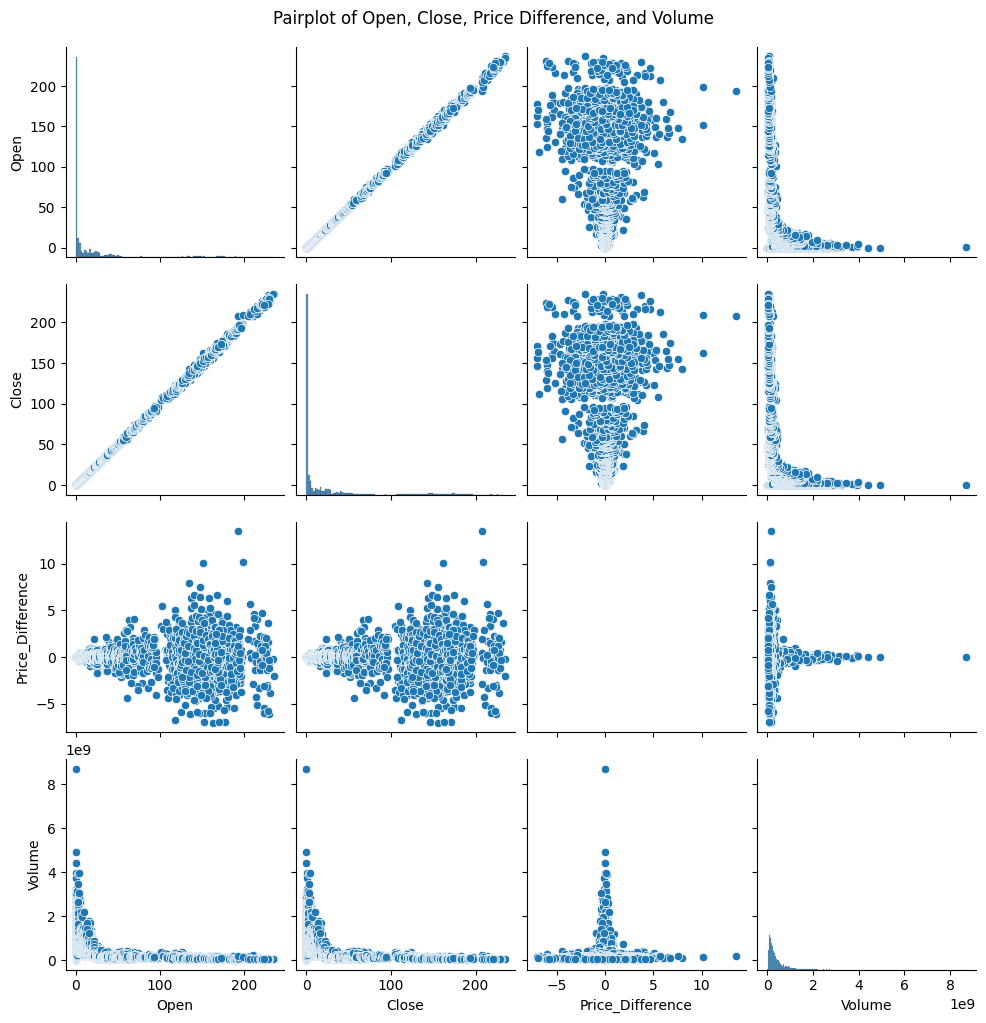

In [34]:
# Calculate the Price_Difference (Close - Open)
df['Price_Difference'] = df['Close'] - df['Open']

# Select columns for pairplot
pairplot_columns_diff = ['Open', 'Close', 'Price_Difference', 'Volume']

# Plot pairplot
sns.pairplot(df[pairplot_columns_diff])
plt.suptitle("Pairplot of Open, Close, Price Difference, and Volume", y=1.02)
plt.show()

**How does stock price Volatility relate to High, Low, and Close prices?**

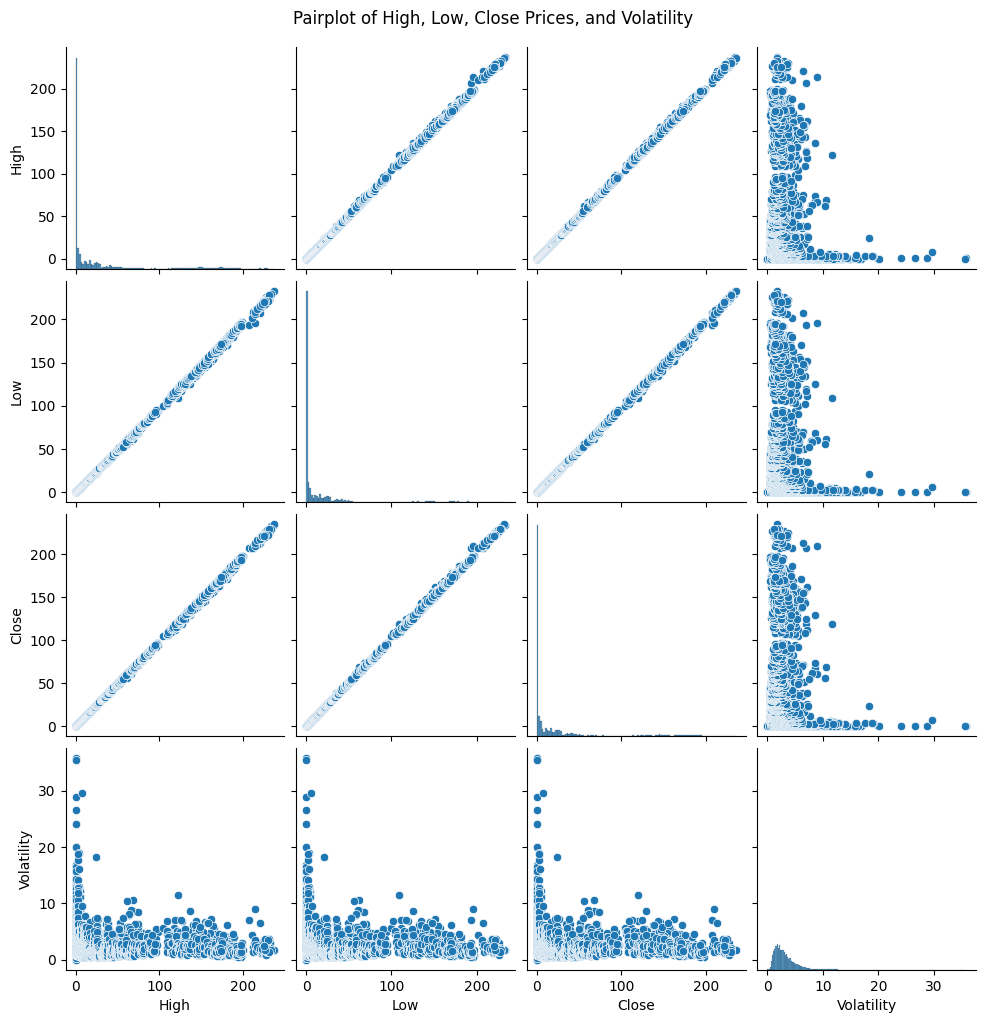

In [35]:
# Select relevant columns for pairplot including Volatility
pairplot_columns_volatility = ['High', 'Low', 'Close', 'Volatility']

# Plot pairplot
sns.pairplot(df[pairplot_columns_volatility])
plt.suptitle("Pairplot of High, Low, Close Prices, and Volatility", y=1.02)
plt.show()

**How does Volume correlate with Volatility and Price_Difference?**

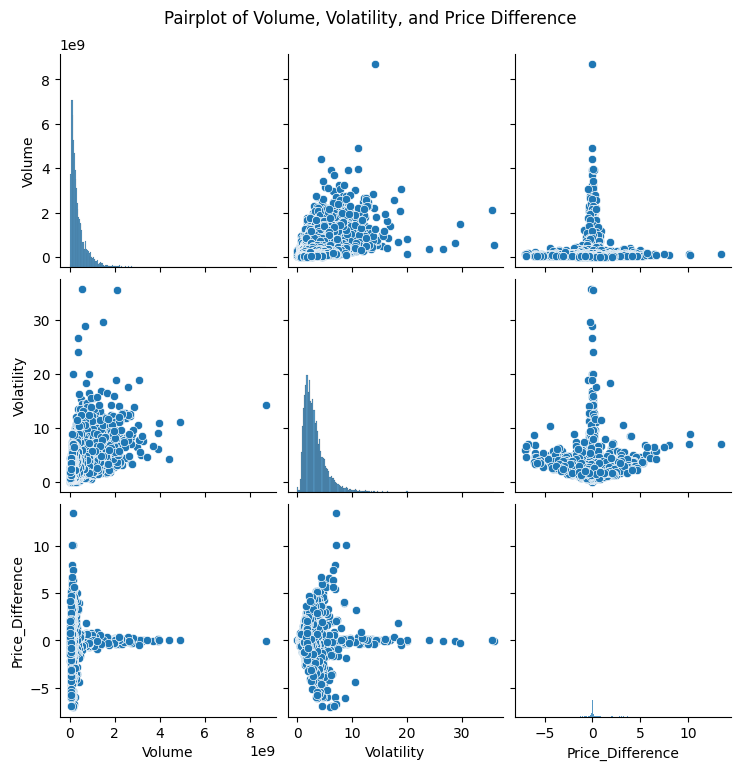

In [36]:
# Select relevant columns for pairplot
pairplot_columns_vol_diff = ['Volume', 'Volatility', 'Price_Difference']

# Plot pairplot
sns.pairplot(df[pairplot_columns_vol_diff])
plt.suptitle("Pairplot of Volume, Volatility, and Price Difference", y=1.02)
plt.show()